In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn import preprocessing

In [18]:
ds=pd.read_csv(r"C:\Users\arunf\OneDrive\Documents\Data Science\Machine Learning\DataSet\Star3642_balanced.csv")

In [19]:
ds

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1
...,...,...,...,...,...,...,...
3637,7.29,3.26,0.95,1.786,K4III,14.856089,0
3638,8.29,6.38,1.00,0.408,F2IV/V,17.314104,1
3639,6.11,2.42,0.79,1.664,M0/M1IIICNp,13.029078,0
3640,7.94,4.94,2.90,0.210,A5V,16.408636,1


In [20]:
ds.shape

(3642, 7)

In [21]:
ds.isnull().sum()

Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64

In [22]:
le=preprocessing.LabelEncoder()

In [23]:
ds['SpType']=le.fit_transform(ds['SpType'].astype(str))

In [24]:
ds

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,522,16.678352,0
1,8.70,2.31,1.29,-0.045,99,15.518060,0
2,5.77,5.50,1.03,0.855,337,14.471813,0
3,6.72,5.26,0.74,-0.015,150,15.324928,1
4,8.76,13.44,1.16,0.584,293,19.401997,1
...,...,...,...,...,...,...,...
3637,7.29,3.26,0.95,1.786,515,14.856089,0
3638,8.29,6.38,1.00,0.408,208,17.314104,1
3639,6.11,2.42,0.79,1.664,539,13.029078,0
3640,7.94,4.94,2.90,0.210,53,16.408636,1


In [27]:
x=ds.drop('TargetClass',1)
x

C:\Users\arunf\AppData\Local\Temp\ipykernel_21652\810394045.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=ds.drop('TargetClass',1)


,Vmag,Plx,e_Plx,B-V,SpType,Amag
0,5.99,13.73,0.58,1.318,522,16.678352
1,8.70,2.31,1.29,-0.045,99,15.518060
2,5.77,5.50,1.03,0.855,337,14.471813
3,6.72,5.26,0.74,-0.015,150,15.324928
4,8.76,13.44,1.16,0.584,293,19.401997
...,...,...,...,...,...,...
3637,7.29,3.26,0.95,1.786,515,14.856089
3638,8.29,6.38,1.00,0.408,208,17.314104
3639,6.11,2.42,0.79,1.664,539,13.029078
3640,7.94,4.94,2.90,0.210,53,16.408636


In [28]:
y=ds['TargetClass']
y

0       0
1       0
2       0
3       1
4       1
       ..
3637    0
3638    1
3639    0
3640    1
3641    0
Name: TargetClass, Length: 3642, dtype: int64

In [31]:
from sklearn.model_selection import cross_val_score

In [ ]:
keys=[]
keys.append(i)
acc=[]
acc.append(scores.mean())
modl=dict(zip(keys,acc))

In [72]:
models={"KNN":KNN(), "GAUSSIAN":GaussianNB(), "BERNOULLI":BernoulliNB(), "MULTINOMIAL":MultinomialNB(), "DECISION TREE":DTC(), 

        "RANDOM FOREST":RFC(), "LOGISTIC":LR(), "SVM":SVC()}

keys=[]
acc=[]
for i in models:
    model=models[i]
    scores=cross_val_score(model,x,y,cv=5)
    print(i,":",scores.mean())
    keys.append(i)
    acc.append(scores.mean())
modl=dict(zip(keys,acc))
print("------------------------------------")
print("Model accuracy :",modl)
print("------------------------------------")
Keymax = max(zip(modl.values(), modl.keys()))
print("max acc :" ,Keymax)

C:\Users\arunf\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\arunf\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNN : 0.927235110568444
GAUSSIAN : 0.8871508464101057
BERNOULLI : 0.5123569845792068
MULTINOMIAL : nan
DECISION TREE : 0.8989546119175749
RANDOM FOREST : 0.9157056934834713
LOGISTIC : 0.8959382866790275


C:\Users\arunf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\arunf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

SVM : 0.8401973198269495
------------------------------------
Model accuracy : {'KNN': 0.927235110568444, 'GAUSSIAN': 0.8871508464101057, 'BERNOULLI': 0.5123569845792068, 'MULTINOMIAL': nan, 'DECISION TREE': 0.8989546119175749, 'RANDOM FOREST': 0.9157056934834713, 'LOGISTIC': 0.8959382866790275, 'SVM': 0.8401973198269495}
------------------------------------
max acc : (0.927235110568444, 'KNN')


In [73]:
knn=KNN()

In [74]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [77]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [76]:
knn.score(xtest,ytest)

C:\Users\arunf\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9222323879231473

In [80]:
pred=knn.predict(xtest)
accuracy=np.mean(pred==ytest.values.flatten())

C:\Users\arunf\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [81]:
accuracy

0.9222323879231473

In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
cm=confusion_matrix(ytest,pred)

In [84]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

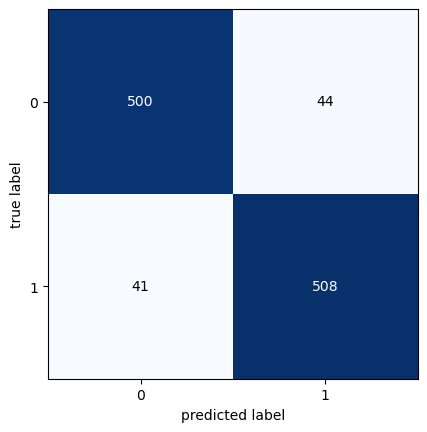

In [85]:
plot_confusion_matrix(cm)

In [86]:
mean=(500+508)/(500+508+41+44)
mean

0.9222323879231473